In [16]:
import numpy as np

path = "/home/andrea/Desktop/Final/Baseline5Prime/5.2/"

filesK6 = []

for rep in range(1, 4):
    for vm in range(1,4):
        for instance in range(1,3):
            filesK6.append(path+'VM'+str(vm)+'_'+str(instance)+'/rep'+str(rep)+'/output_C2_T1_W64_K6_R'+str(rep)+'.log')

In [17]:
percentages = [[[],[],[],[],[],[]], [[],[],[],[],[],[]], [[],[],[],[],[],[]]]

for rep in range(1, 4):
    fileToOpen = []
    for vm in range(1,4):
        for instance in range(1,3):
            fileToOpen.append([z for z in filesK6 if z == path+'VM'+str(vm)+'_'+str(instance)+'/rep'+str(rep)+'/output_C2_T1_W64_K6_R'+str(rep)+'.log'])
 
    for j in range(0, len(fileToOpen)):
        fileI = open(fileToOpen[j][0], "r")
        linesI = []
        for line in fileI:
            linesI.append(line)

        xI = np.asarray(linesI)

        k = len(xI)-2
        x = []
        while(xI[k] != "---\n"):
            a = xI[k].split(" ")
            if float(a[-1][:-1]) / 10 < 1:
                ind = -10
            elif float(a[-1][:-1]) / 10 >= 10:
                ind = -8
            else:
                ind = -9
            x.append([float(a[ind]), float(a[-1][:-1])])
            k -= 1
            
        x = x[::-1]
        i = 0
        l = 1

        step = 0.25      
        l = 1
        
        while step*l < x[-1][0] and len(percentages[rep-1][j]) < 79 :
            while x[i][0] < (step*l) :
                i += 1
            if(i != 0):
                percentages[rep-1][j].append(((step*l - x[i-1][0])/(x[i][0] - x[i-1][0]))*x[i][1] - ((step*l - x[i][0])/(x[i][0] - x[i-1][0]))*x[i-1][1])   
            else:
                percentages[rep-1][j].append(0)
            l += 1


In [18]:
valori = [[],[],[]]
for rep in range(0, 3):
    for k in range(0, len(percentages[0][0])):
        valori[rep].append(np.mean([percentages[rep][0][k], percentages[rep][1][k], percentages[rep][2][k], percentages[rep][3][k], percentages[rep][4][k], percentages[rep][5][k]]))

In [19]:
values = []
errValues = []
for j in range(0,len(valori[0])):
    values.append(np.mean([valori[0][j], valori[1][j], valori[2][j]]))
    errValues.append(np.std([valori[0][j], valori[1][j], valori[2][j]]))

i = len(values)-1
while i > 0:
    values[i] = values[i] - values[i-1]
    i -= 1

In [20]:
responses = np.zeros(len(valori[0]))
i = step
idx = 0
while i <= len(valori[0])*step:
    responses[idx] = i
    i += step
    idx += 1


In [21]:
fileOutput = open(path+"histogramDataMemtier.txt", "w")

In [22]:
fileOutput.write("Histogram Data\n\nTime\tPercentage\n\n")
for i in range(0, len(responses)):
    fileOutput.write(str(responses[i])+"\t"+str(values[i])+"\n")
fileOutput.close()

In [6]:
import matplotlib.pyplot as plt

In [21]:
plt.figure(figsize=(27, 20))
width = step*2/3

plt.title('Response Time Distribution measured on clients with Sharding', fontsize= 40)
plt.xlabel("Response Time [msec] ", fontsize= 35)
plt.yticks(fontsize=25)
plt.ylabel("Percentage", fontsize= 35)
rect = plt.bar(responses, values, width, yerr=errValues, ecolor='blue', color='lightblue', capsize=4)
plt.xticks(np.arange(0, 20.5, 1), fontsize = 25)
plt.yticks(fontsize=25)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.03*height,
                '%.3f' % float(height), ha='center', va='bottom', fontsize=16)

#autolabel(rect)


In [22]:
plt.savefig("/home/andrea/Desktop/Final/Baseline5Prime/rtDistributionClientSharded.png")

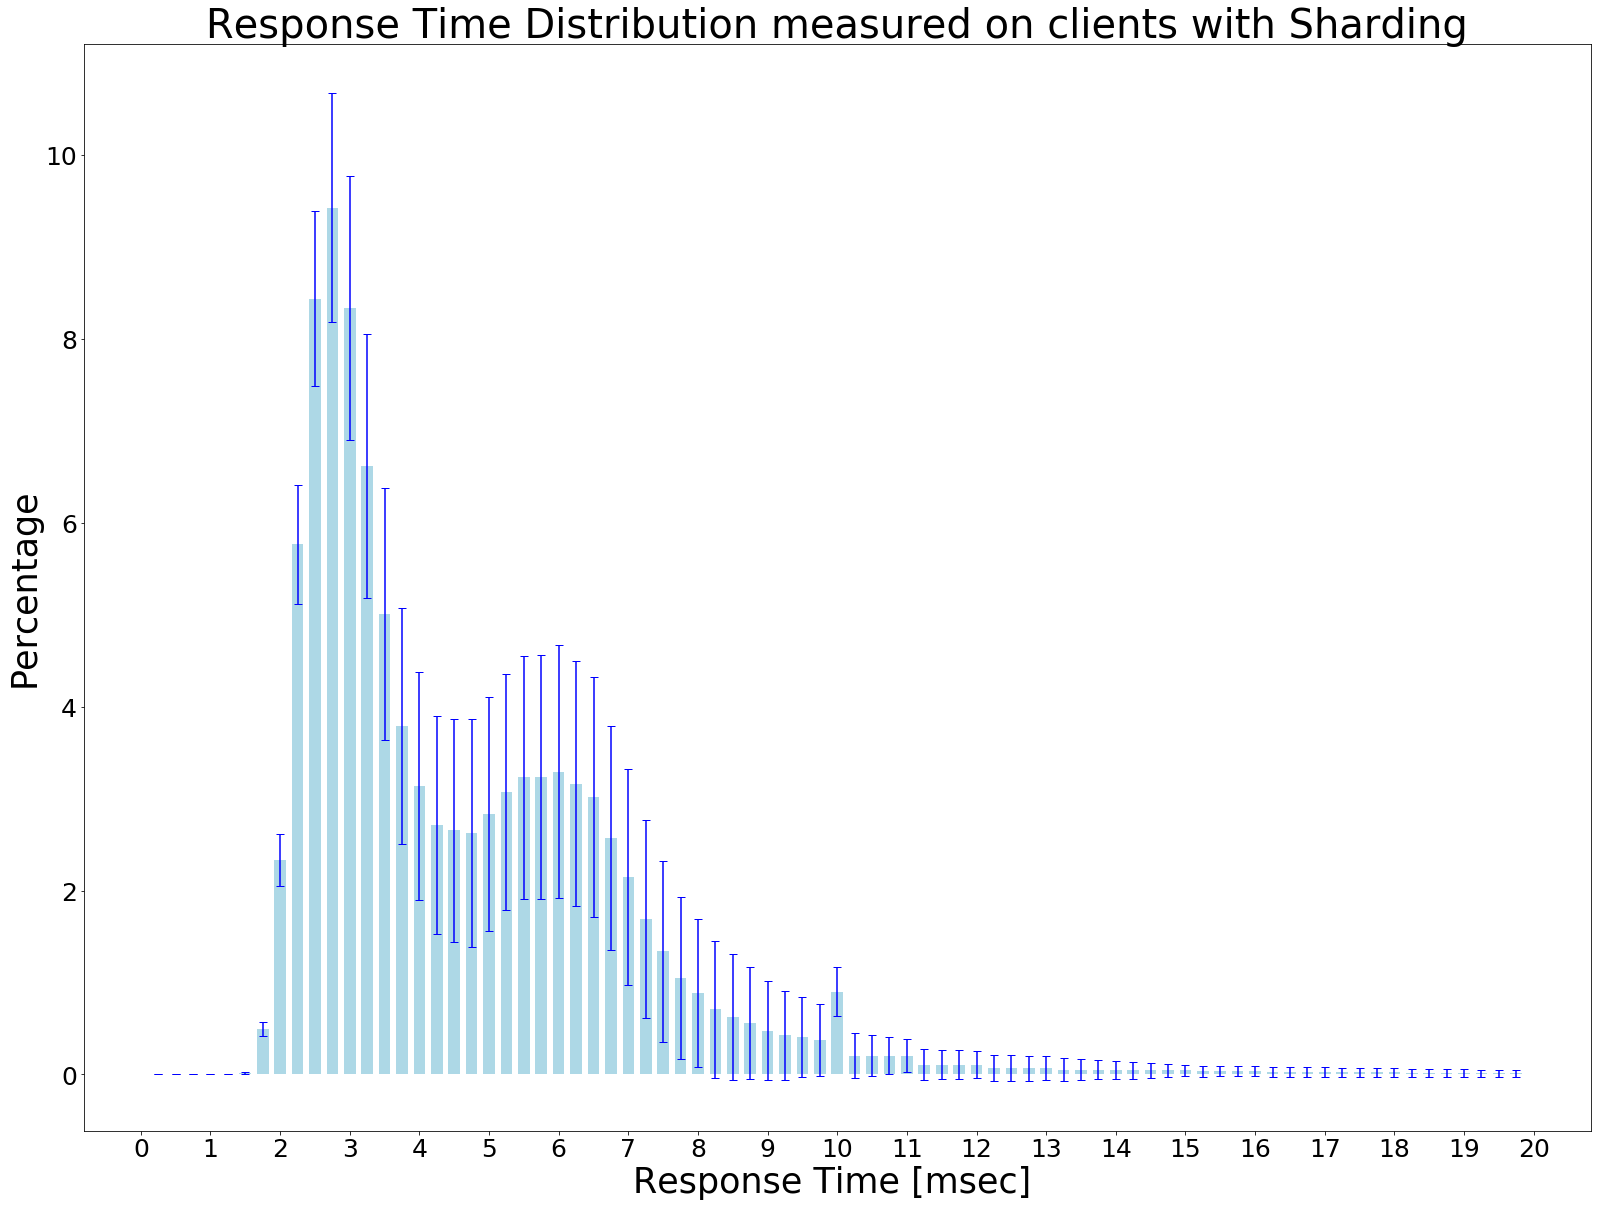

In [20]:
plt.show()